In [38]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
# Define matrix
A = np.array([
    [1, 4, 3, 0, 0, 2, 0, 5], # song0
    [2, 1, 0, 2, 3, 1, 4, 0],  # song1
    [3, 0, 1, 1, 1, 1, 1, 3],  # song2
    [4, 3, 2, 0, 3, 4, 4, 0],  # song3
    [1, 5, 2, 1, 4, 2, 0, 1],   # song4
    [5, 1, 4, 5, 1, 3, 3, 5]   # song5
])

In [4]:
A.T

array([[1, 2, 3, 4, 1, 5],
       [4, 1, 0, 3, 5, 1],
       [3, 0, 1, 2, 2, 4],
       [0, 2, 1, 0, 1, 5],
       [0, 3, 1, 3, 4, 1],
       [2, 1, 1, 4, 2, 3],
       [0, 4, 1, 4, 0, 3],
       [5, 0, 3, 0, 1, 5]])

In [11]:
# Perform SVD
U, s, Vh = np.linalg.svd(A.T, full_matrices=True)

In [12]:
# Extract the individual components
U

array([[-4.50865287e-01,  3.39992797e-02, -3.49495857e-01,
        -2.69110226e-01,  1.33163596e-01,  5.54868344e-01,
         2.28336976e-02, -5.24274808e-01],
       [-3.51500756e-01,  1.79425309e-01,  7.05076550e-01,
         8.14979472e-02, -6.42265653e-02, -2.63496452e-01,
        -1.34023738e-01, -4.98960045e-01],
       [-3.50226532e-01, -2.32955389e-01,  1.43369058e-01,
        -6.96331034e-02,  4.65271892e-01, -1.72699507e-01,
         7.17052587e-01,  1.92878826e-01],
       [-2.75161109e-01, -1.59804405e-01, -3.77140009e-01,
         7.27218098e-01,  2.85981311e-01, -2.58912568e-01,
        -2.59085763e-01, -1.08266832e-01],
       [-2.89824800e-01,  5.11481765e-01,  1.38327606e-01,
         4.42583267e-01, -2.12898468e-01,  4.52544319e-01,
         1.80614103e-01,  3.95765009e-01],
       [-3.64531267e-01,  1.20903148e-01,  7.87611467e-02,
        -3.69450842e-01,  3.78796573e-01, -4.55145300e-02,
        -5.76632206e-01,  4.81392796e-01],
       [-3.27259537e-01,  3.719589

In [13]:
Vh

array([[-0.35822216, -0.27912296, -0.2648701 , -0.46204067, -0.35066628,
        -0.62222396],
       [-0.46048531,  0.45016278, -0.19760466,  0.54445463,  0.27938126,
        -0.41445677],
       [ 0.54981647, -0.30897822, -0.19172713,  0.00252558,  0.60885328,
        -0.44132338],
       [-0.28473899,  0.32584692, -0.09931482, -0.65813259,  0.56208335,
         0.23196524],
       [-0.40283442, -0.6354713 , -0.4164458 ,  0.23746974,  0.20204155,
         0.40405555],
       [-0.33760948, -0.33760379,  0.81899108,  0.02346936,  0.26742938,
        -0.17096151]])

In [14]:
s

array([15.57233919,  6.82197511,  6.38343088,  3.12738169,  1.87051   ,
        1.71329912])

In [16]:
# Let's construct the matrix

m, n = A.T.shape

m, n

(8, 6)

In [19]:
# Create a zero matrix of the correct dimensions of sigma
sigma = np.zeros((m, n))
sigma

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [22]:
# Populate the diagonal of sigma with the singular values
sigma[:min(m, n), :min(m, n)]=np.diag(s)
sigma

array([[15.57233919,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  6.82197511,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  6.38343088,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.12738169,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.87051   ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.71329912],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [23]:
s_t = s[:3]
s_t

array([15.57233919,  6.82197511,  6.38343088])

In [24]:
sigma_t = np.zeros((m, n))
sigma_t[:3, :3]=np.diag(s_t)
sigma_t

array([[15.57233919,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  6.82197511,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  6.38343088,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [25]:
U_t = U[:, :3]
U_t

array([[-0.45086529,  0.03399928, -0.34949586],
       [-0.35150076,  0.17942531,  0.70507655],
       [-0.35022653, -0.23295539,  0.14336906],
       [-0.27516111, -0.1598044 , -0.37714001],
       [-0.2898248 ,  0.51148176,  0.13832761],
       [-0.36453127,  0.12090315,  0.07876115],
       [-0.32725954,  0.37195895, -0.42947247],
       [-0.38834931, -0.68721199,  0.09025512]])

In [27]:
# Extract the individual axes points
U_t_x = U_t[:, 0]
U_t_y = U_t[:, 1]
U_t_z = U_t[:, 2]


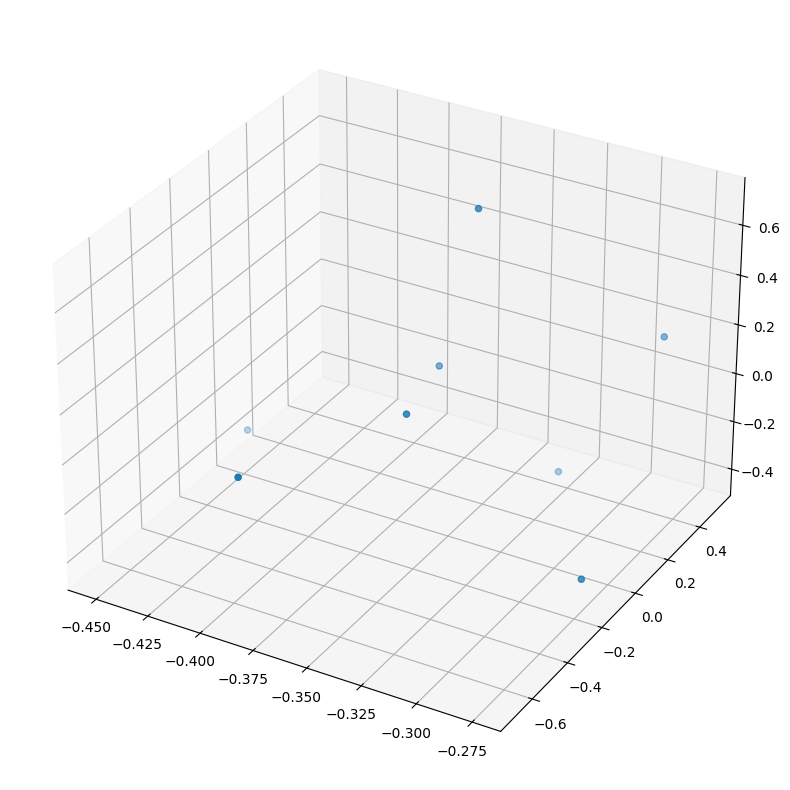

In [32]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot
ax = fig.add_subplot(111, projection="3d")

# Plot the points
ax.scatter(U_t_x, U_t_y, U_t_z)

plt.show()

In [37]:
# Determine the clusters from the U

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(U)

kmeans.labels_

array([2, 2, 2, 4, 0, 2, 1, 3], dtype=int32)

In [39]:
df = pd.DataFrame(U)
df

,0,1,2,3,4,5,6,7
0,-0.450865,0.033999,-0.349496,-0.269110,0.133164,0.554868,0.022834,-0.524275
1,-0.351501,0.179425,0.705077,0.081498,-0.064227,-0.263496,-0.134024,-0.498960
2,-0.350227,-0.232955,0.143369,-0.069633,0.465272,-0.172700,0.717053,0.192879
3,-0.275161,-0.159804,-0.377140,0.727218,0.285981,-0.258913,-0.259086,-0.108267
4,-0.289825,0.511482,0.138328,0.442583,-0.212898,0.452544,0.180614,0.395765
5,-0.364531,0.120903,0.078761,-0.369451,0.378797,-0.045515,-0.576632,0.481393
6,-0.327260,0.371959,-0.429472,-0.234241,-0.425705,-0.554737,0.160329,0.023839
7,-0.388349,-0.687212,0.090255,0.000086,-0.556634,0.105964,-0.096926,0.195739


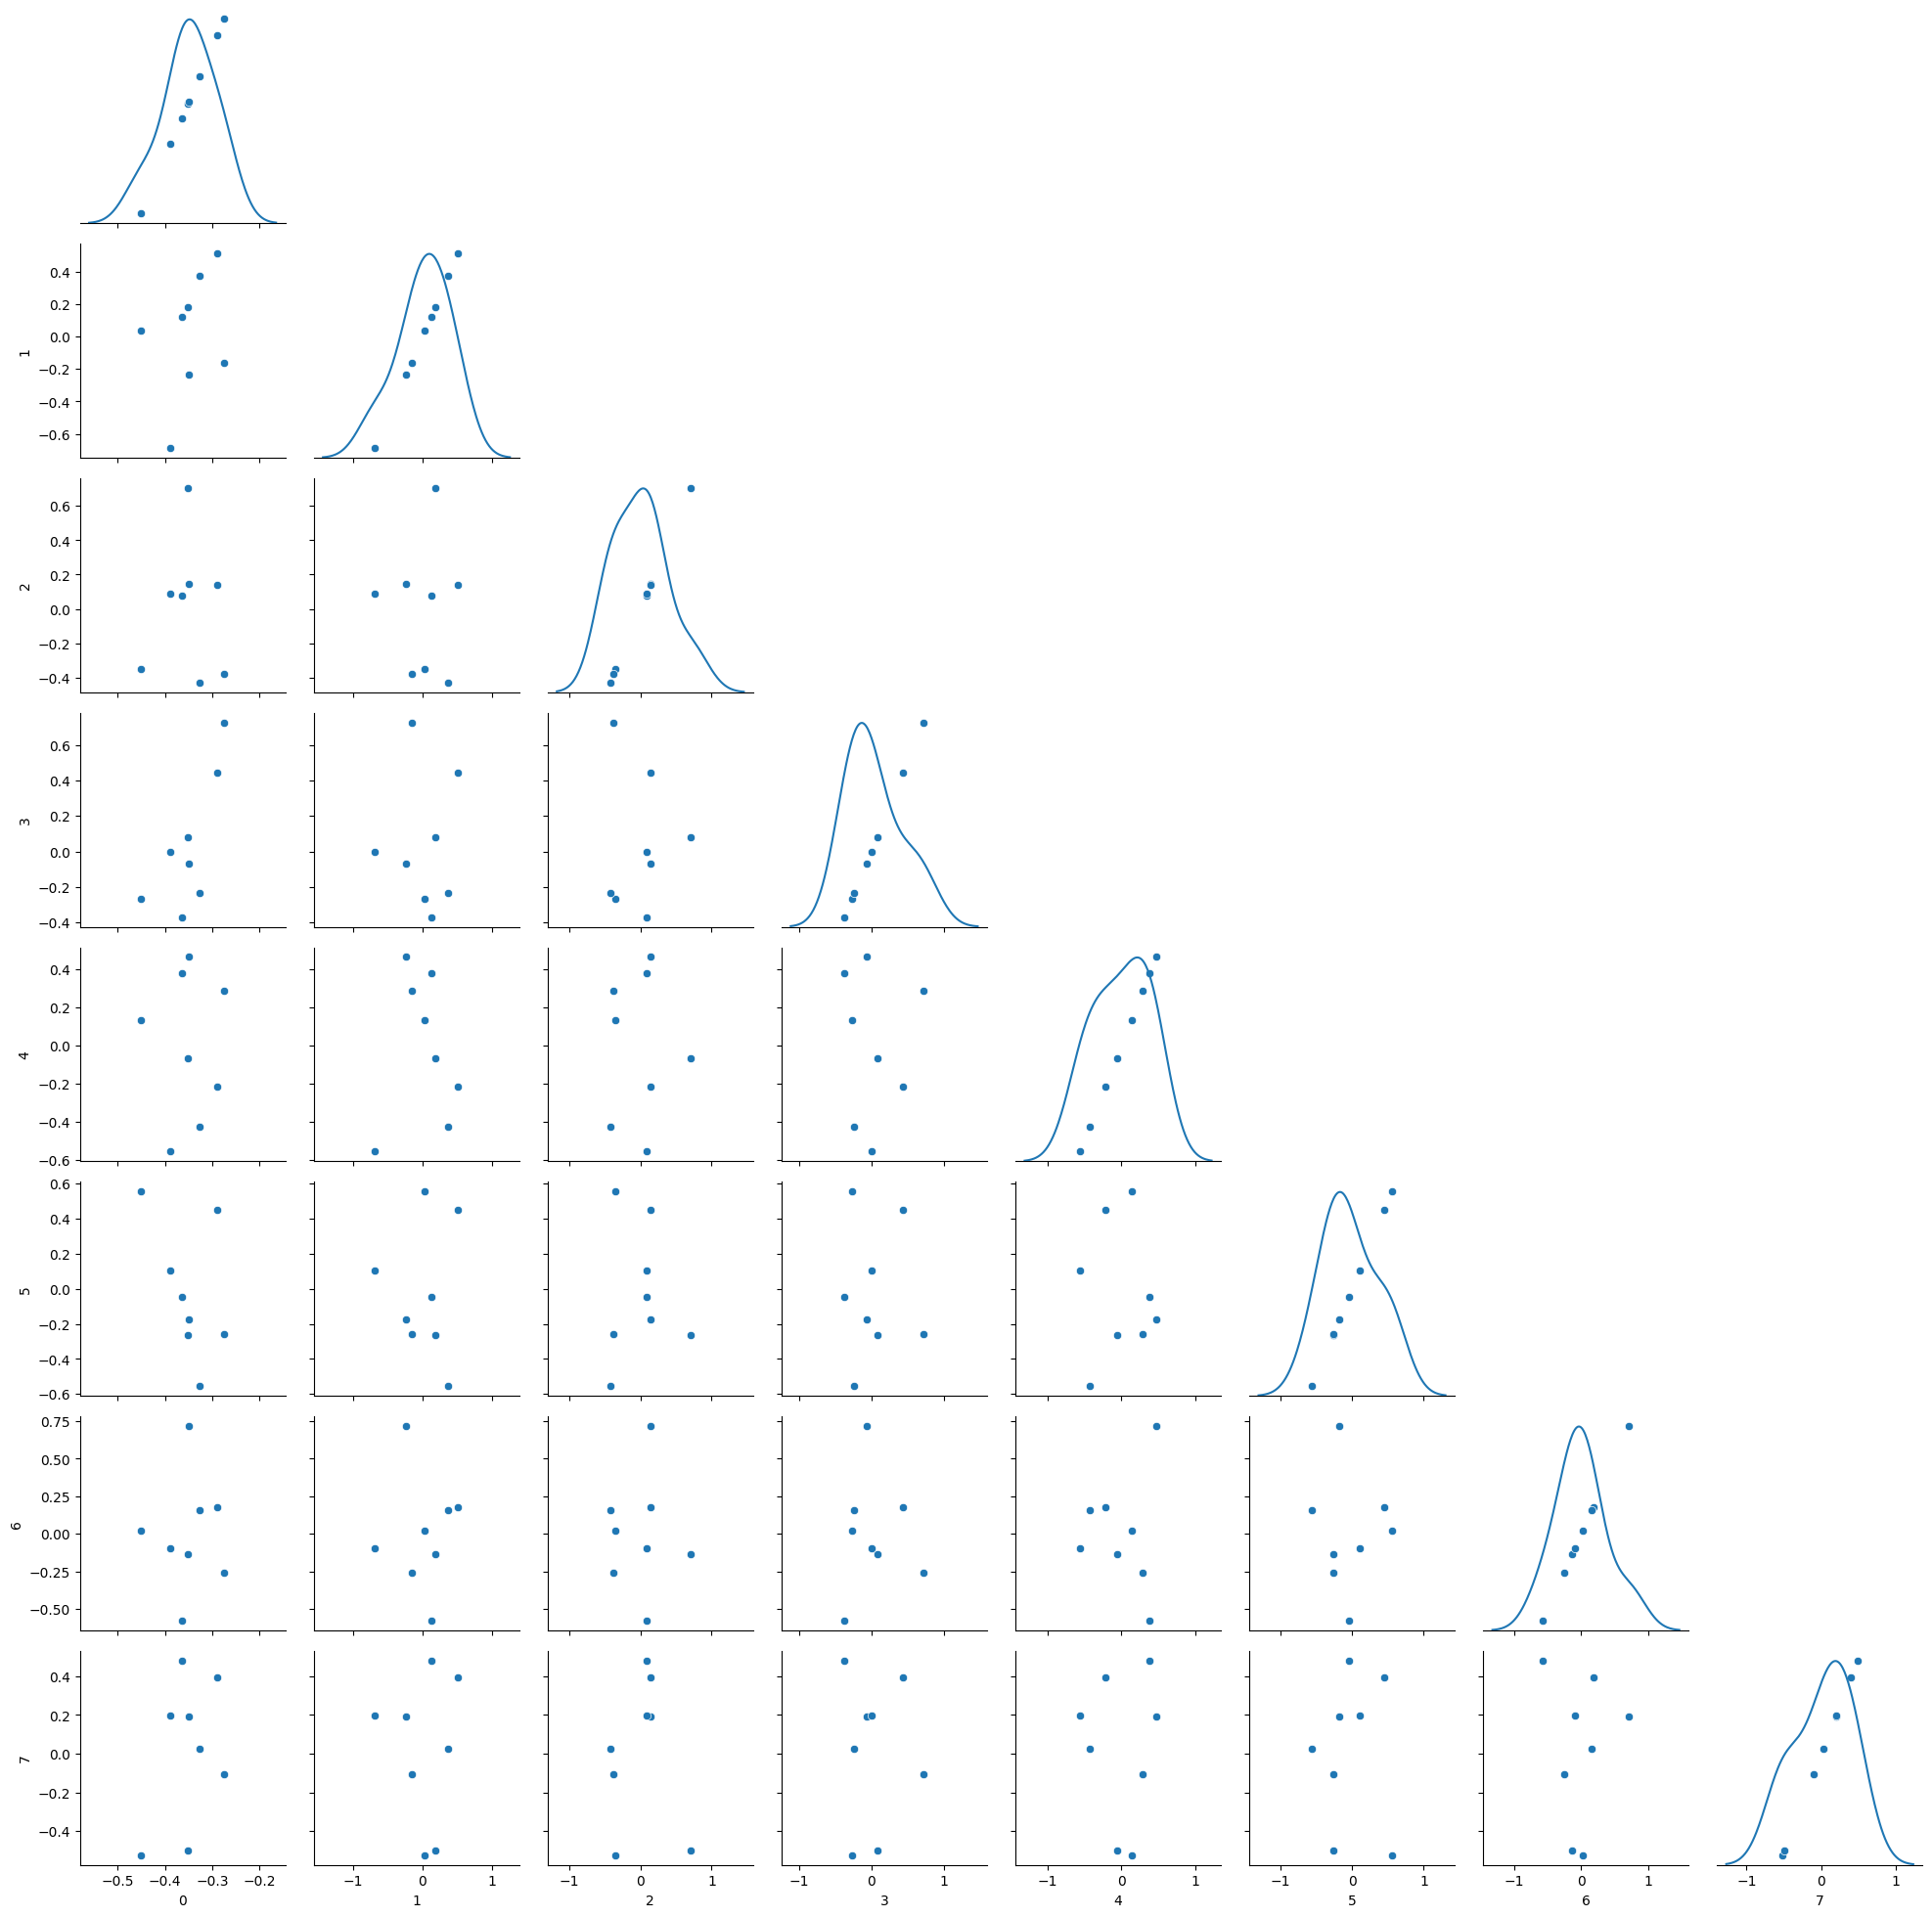

In [43]:
g = sns.PairGrid(df, diag_sharey=False, corner=True)
g.map(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [44]:
U_flatten = U.flatten()
U_flatten

array([-4.50865287e-01,  3.39992797e-02, -3.49495857e-01, -2.69110226e-01,
        1.33163596e-01,  5.54868344e-01,  2.28336976e-02, -5.24274808e-01,
       -3.51500756e-01,  1.79425309e-01,  7.05076550e-01,  8.14979472e-02,
       -6.42265653e-02, -2.63496452e-01, -1.34023738e-01, -4.98960045e-01,
       -3.50226532e-01, -2.32955389e-01,  1.43369058e-01, -6.96331034e-02,
        4.65271892e-01, -1.72699507e-01,  7.17052587e-01,  1.92878826e-01,
       -2.75161109e-01, -1.59804405e-01, -3.77140009e-01,  7.27218098e-01,
        2.85981311e-01, -2.58912568e-01, -2.59085763e-01, -1.08266832e-01,
       -2.89824800e-01,  5.11481765e-01,  1.38327606e-01,  4.42583267e-01,
       -2.12898468e-01,  4.52544319e-01,  1.80614103e-01,  3.95765009e-01,
       -3.64531267e-01,  1.20903148e-01,  7.87611467e-02, -3.69450842e-01,
        3.78796573e-01, -4.55145300e-02, -5.76632206e-01,  4.81392796e-01,
       -3.27259537e-01,  3.71958951e-01, -4.29472467e-01, -2.34241241e-01,
       -4.25704959e-01, -

In [46]:
df1 = pd.DataFrame(U_flatten)
df1

,0
0,-0.450865
1,0.033999
2,-0.349496
3,-0.269110
4,0.133164
...,...
59,0.000086
60,-0.556634
61,0.105964
62,-0.096926


<Axes: >

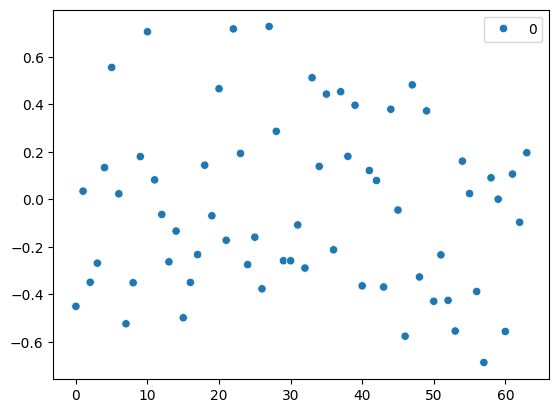

In [47]:
sns.scatterplot(data=df1)

In [49]:
df_Vh = pd.DataFrame(Vh.T)
df_Vh

,0,1,2,3,4,5
0,-0.358222,-0.460485,0.549816,-0.284739,-0.402834,-0.337609
1,-0.279123,0.450163,-0.308978,0.325847,-0.635471,-0.337604
2,-0.264870,-0.197605,-0.191727,-0.099315,-0.416446,0.818991
3,-0.462041,0.544455,0.002526,-0.658133,0.237470,0.023469
4,-0.350666,0.279381,0.608853,0.562083,0.202042,0.267429
5,-0.622224,-0.414457,-0.441323,0.231965,0.404056,-0.170962


In [50]:
Vh_t = Vh.T[:, :3]
Vh_t

array([[-0.35822216, -0.46048531,  0.54981647],
       [-0.27912296,  0.45016278, -0.30897822],
       [-0.2648701 , -0.19760466, -0.19172713],
       [-0.46204067,  0.54445463,  0.00252558],
       [-0.35066628,  0.27938126,  0.60885328],
       [-0.62222396, -0.41445677, -0.44132338]])

In [51]:
# Extract the individual axes points
Vh_t_x = Vh_t[:, 0]
Vh_t_y = Vh_t[:, 1]
Vh_t_z = Vh_t[:, 2]

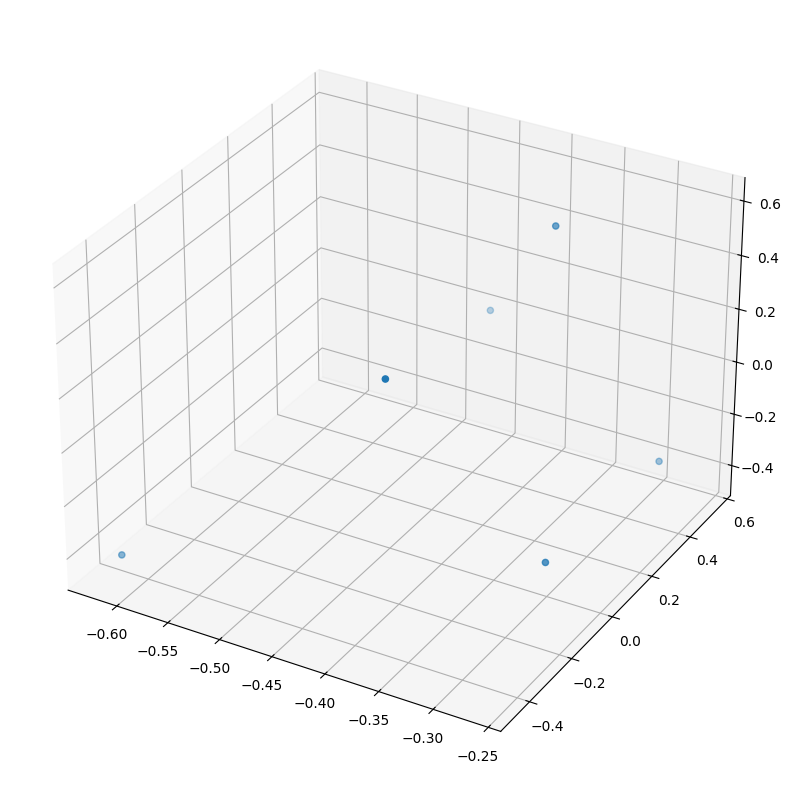

In [53]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot
ax = fig.add_subplot(111, projection="3d")

# Plot the points
ax.scatter(Vh_t_x, Vh_t_y, Vh_t_z)

plt.show()